In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.gridspec as gridspec
from aba import Atlas


plt.rcParams['xtick.bottom'] = True  # Show ticks at the bottom of the x-axis
plt.rcParams['xtick.top'] = True     # Show ticks at the top of the x-axis
plt.rcParams['ytick.left'] = True    # Show ticks on the left side of the y-axis
plt.rcParams['ytick.right'] = True   # Show ticks on the right side of the y-axis


plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5

atlas = Atlas()


In [4]:
observer = pd.read_excel('Data/areas_observer_density.xlsx')
observer = observer[~observer['acronym'].isin(['LSS', 'SNl', 'InCo', 'NC', 'PIN', 'REth','AHA','PSCH','AD','AV'])]
observer = observer.sort_values(by='order').reset_index(drop=True)


demonstrator = pd.read_excel('Data/areas_demonstrator_density.xlsx')
demonstrator = demonstrator[~demonstrator['acronym'].isin(['LSS', 'SNl', 'InCo', 'NC', 'PIN', 'REth','AHA','PSCH', 'III','AD','AV'])]
demonstrator = demonstrator.sort_values(by='order').reset_index(drop=True)


acro2col = {row['acronym']:row['struct_color'] for i,row in observer.iterrows()}
acro2name = {row['acronym']:row['name'] for i,row in observer.iterrows()}
acro2struct = {row['acronym']:row['structure'] for i,row in observer.iterrows()}

## Fig 4 C

All areas activated: 88 
	Observer: 88 Demonstrator: 44 
Shared areas: 44 
	Observer only: 44 Demonstrator only: 0


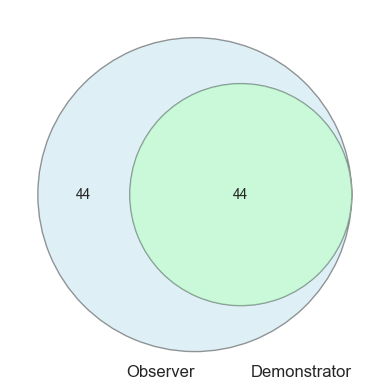

In [17]:
observer_acro = set(observer['acronym'].values)
demonstrator_acro = set(demonstrator['acronym'].values)
area_all = observer_acro | demonstrator_acro
area_shared = observer_acro & demonstrator_acro
area_observer_only = observer_acro - demonstrator_acro
area_demonstrator_only = demonstrator_acro - observer_acro

print('All areas activated:',len(area_all),'\n\tObserver:', len(observer_acro), 'Demonstrator:', len(demonstrator_acro),
      '\nShared areas:', len(area_shared), '\n\tObserver only:', len(area_observer_only), 'Demonstrator only:', len(area_demonstrator_only))


v= venn2([observer_acro, demonstrator_acro], ('Observer', 'Demonstrator'),set_colors=('lightblue','green'))
v.get_patch_by_id('A').set_edgecolor('k')
v.get_patch_by_id('B').set_edgecolor('k')
apos = v.get_label_by_id('A').get_position()
v.get_label_by_id('B').set_position((apos[0]+.2,apos[1]))
v.hide_zeroes()
plt.show()

## Fig. 4D

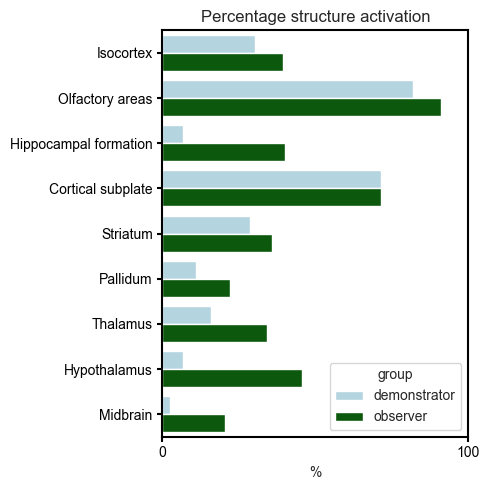

In [22]:
obs_structures = observer.structure.value_counts(sort=False)
obs_structures.name = 'observer'
structures = obs_structures.sort_index()
obs_structures_perc = (obs_structures/obs_structures.sum())*100

act_structures = demonstrator.structure.value_counts(sort=False)
act_structures.name = 'demonstrator'
act_structures = act_structures.sort_index()
act_structures_perc = (act_structures/act_structures.sum())*100

struct2col = observer[['structure','struct_color']].drop_duplicates().set_index('structure').to_dict()['struct_color']



struct_perc = pd.concat([obs_structures_perc,act_structures_perc],axis=1)
struct_perc = struct_perc.stack().reset_index().rename(columns={'level_0':'structure','level_1':'group'})

#struct_raw = pd.concat([obs_structures,act_structures],axis=1)
#struct_raw = struct_raw.stack().reset_index().rename(columns={'level_0':'structure','level_1':'group'})

import seaborn as sns

fig, ax = plt.subplots( figsize=(5,5))

structure_children = atlas.get_mid_ontology_anatomy_sets()
structure_children_names=structure_children.copy()
for stru in structure_children.keys():
      structure_children_names[stru] = atlas.ids_to_acronyms(structure_children[stru])
      structure_children[stru] = len(structure_children[stru])
structure_children

obs_structures_area_perc = obs_structures.copy()
for ind in obs_structures.index:
      obs_structures_area_perc.loc[ind] = (obs_structures.loc[ind]/structure_children[ind])*100

act_structures_area_perc = act_structures.copy()
for ind in act_structures.index:
      act_structures_area_perc.loc[ind] = (act_structures.loc[ind]/structure_children[ind])*100

struct_perc = pd.concat([obs_structures_area_perc,act_structures_area_perc],axis=1)
struct_perc = struct_perc.stack().reset_index().rename(columns={'level_0':'structure','level_1':'group'})

sns.barplot(data=struct_perc, y='structure', x=0, hue='group', orient='h',order=observer[['structure','order']].drop_duplicates().structure.values,legend=True,ax=ax,palette=['lightblue','darkgreen'],hue_order=['demonstrator','observer'])
ax.set_ylabel('')
ax.set_xlabel('%')
ax.grid(False)
ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
ax.set_title('Percentage structure activation')

ax.set_xlim([0,100])
ax.set_xticks([0,100])

plt.tight_layout()